In [34]:
# Imports
import sys
import numpy as np

%cd Q:\sachuriga\Sachuriga_Python\cnn-ripple-main\src\notebooks
sys.path.insert(1, r'Q:\sachuriga\Sachuriga_Python\cnn-ripple-main\src\cnn')

Q:\sachuriga\Sachuriga_Python\cnn-ripple-main\src\notebooks


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"

# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope

    
channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })

def process_channels(chs, bad_channels):
    # Remove values that are in bad_channels
    filtered = [x for x in chs if x not in bad_channels]
    
    # If length > 8, randomly select 8 while preserving original order
    if len(filtered) > 8:
        import random
        indices = sorted(random.sample(range(len(filtered)), 8))
        filtered = [filtered[i] for i in indices]
    
    # If length < 8, duplicate the last value until length is 8
    elif len(filtered) < 8 and filtered:  # Check if list isn't empty
        while len(filtered) < 8:
            filtered.append(filtered[-1])
    
    # If filtered is empty, return list of 8 zeros (or any default value)
    if not filtered:
        filtered = [0] * 8
        
    return filtered


probe_df = pd.DataFrame(data)
probe_df 

#for i in range(6):
temp = probe_df[probe_df['group_id']==3]
temp_chs = temp.sort_values('y', ascending=False)
temp_chs['channel_id']

36    36
39    48
41    58
42    56
34    45
33    32
37    53
40    47
32    33
35    40
38    50
Name: channel_id, dtype: int64

In [83]:
lfp = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/65588/65588_2024-03-06_15-45-53_A_phy_k_manual/lfp_zscore.npy")
times = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/65588/65588_2024-03-06_15-45-53_A_phy_k_manual/lfp_times.npy")
chs = temp_chs['channel_id'].values
bad_channels = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/65588/65588_2024-03-06_15-45-53_A_phy_k_manual/bad_channels.npy")
# new_ids = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/63383/63383_2024-07-25_12-57-40_A_phy_k_manual/new_channels_name.npy")
# ids = [np.int64(ch.split("CH")[1])-1 for ch in new_ids]

In [84]:
new_chs = process_channels(chs, bad_channels)
#new_channels = [ids.index(ch) for ch in new_chs]
group_5 = lfp[:,new_chs]
group_5.shape
data = group_5

In [92]:
import sys
sys.path.append(r'Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src/')
sys.path.append(r'Q:\sachuriga\Sachuriga_Python\cnn-ripple-main/src/')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nwb4fp.analyses.data import get_pkl_files, group_channels_by_group, find_middle_channel_per_group, map_middle_channels_to_input,get_nearest_8_by_position, load_speed_fromNWB, pos2speed, find_run_indices
from nwb4fp.preprocess.down_sample_lfp import down_sample_lfp_test
import pynapple as nap
from cnn.load_data import z_score_normalization, downsample_data
from cnn.utils import smooth2ripple
from cnn.load_data import generate_overlapping_windows


file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"
base_folder = r"S:/Sachuriga/Ephys_Recording/CR_CA1"
base_nwb_fodler  =r"S:\Sachuriga/nwb/test4neo"


# Read the file and parse the dictionary
local_vars = {'np': np}
with open(file_path, 'r') as file:
    exec(file.read(), local_vars)  # Execute the file content with NumPy in scope

channel_groups = local_vars.get('channel_groups')
if channel_groups is None:
    raise ValueError(f"'channel_groups' not found in {file_path}")

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })
probe_df = pd.DataFrame(data)
pkl_files = get_pkl_files(r"Q:/crhip\Sachuriga/filre_with_table/adjust_y_with _meanVAlue/")
base_tsne_folder = r"Q:/crhip\Sachuriga/filre_with_table/adjust_y_with _meanVAlue/"
base_tsne_ripplemax_folder = r"Q:/crhip\Sachuriga/filre_with_table/adjust_y_with _meanVAlue/clusters_with_tsneLabel/ripple_max"
all_dataframes = []

import pandas as pd
file = r"63383_2024-07-25_A_units_table_withDLC.pkl"
# Read and process the pickle file
print(fr"working on this folder {file}")
df_file = pd.read_pickle(fr"{base_tsne_folder}{file}")

#df_file = pd.read_pickle(fr"S:/Sachuriga/filre_with_table/adjust_y_with _meanVAlue/63385_2024-07-22_B_units_table_withDLC.pkl")
unit_table = pd.DataFrame(df_file)
pyramidal_df = unit_table[unit_table['cell_type']=="pyramidal"]

file_path_nwb = pyramidal_df['session_id'].iloc[0]
channel_list = pyramidal_df['ch'].values

# Channel grouping and calculations
grouped_channels = group_channels_by_group(channel_list)
middle_channels = find_middle_channel_per_group(grouped_channels)
output_list = map_middle_channels_to_input(channel_list, middle_channels)
animal_id = unit_table['matlab_animal'].iloc[0]
nwb_file = unit_table['session_id'].iloc[0]
phy_folder = unit_table['session_id'].iloc[0].split(".nwb")[0]
os_fodler = unit_table['session_id'].iloc[0].split("_phy_k_manual.nwb")[0]
temp_folder = r"C:/temp_lfp"
path = fr"{base_folder }/{animal_id}/{phy_folder}/"
raw_path = fr"{base_folder}/{animal_id}/{os_fodler}"
npdata = nap.load_file(fr"{base_nwb_fodler}/{nwb_file}")
#down_sample_lfp_test(path,raw_path)
pos_cord = load_speed_fromNWB(npdata['XY_mid_brain'])
## filter speed
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.1)
time_stemp = pos_cord[:,0]
starts,stops = find_run_indices(smoothed_speed, threshold=0.05)
run_ep = nap.IntervalSet(start=time_stemp[starts], end=time_stemp[stops], time_units='s')
wake_ep = nap.IntervalSet(start=time_stemp[0], end=time_stemp[-1], time_units='s')
rest_ep = wake_ep.set_diff(run_ep)
## find max
lfp = np.load(rf"{base_folder}/{animal_id}/{phy_folder}/lfp_zscore.npy")
lfp_times = np.load(rf"{base_folder}/{animal_id}/{phy_folder}/lfp_times.npy")
try:
    bad_channels = np.load(rf"{base_folder}/{animal_id}/{phy_folder}/bad_channels.npy")
except Exception as e:
    bad_channels = []
result_dict={}
ripple_channel={}
ripple_channel_3std={}
ripple_channel_4std={}
group=3
ch=33
temp = probe_df[probe_df['group_id']==group]
temp_chs = temp.sort_values('y', ascending=False)
chs = temp_chs['channel_id'].values
# Example usage
numbers = list(chs)
target = np.int64(ch)
bad_channels=list(bad_channels)
result = get_nearest_8_by_position(numbers, target, bad_channels)

print(fr"group is {group}, midlle channel is {ch}")
print(fr"results is {result}")

# Data preprocessing (unchanged)
#temp = [31, 12, 23, 28, 15, 29, 7, 13]  # Electrode indices
temp_lfps = []
temp_lfps_times = []
temp = result
# Extract LFP signals for selected electrodes
chs =  [36,48, 58, 56, 45, 32, 53, 47, 33, 40 , 50]
for ch in chs:
    temp_lfp = lfp[:, ch]
    eeg_examples = nap.Tsd(t=lfp_times, d=temp_lfp, fs=1250)
    signal = eeg_examples.restrict(rest_ep).values
    t = eeg_examples.restrict(rest_ep).index.values
    temp_lfps.append(list(signal))
    temp_lfps_times = list(t)

# Convert to numpy array and normalize
raw_lfp = np.array(temp_lfps).T
data = raw_lfp 
data = z_score_normalization(data)
average_powers, swr_events, max_electrode = process_swr_analysis(data, temp, electrode_idx=chs.index(ch), sampling_rate=1250, n_electrodes=11, amplitude_threshold=2)
average_powers1, swr_events1, max_electrode1 = process_swr_analysis(data, temp, electrode_idx=chs.index(ch), sampling_rate=1250, n_electrodes=11, amplitude_threshold=3)
average_powers2, swr_events2, max_electrode2 = process_swr_analysis(data, temp, electrode_idx=chs.index(ch), sampling_rate=1250, n_electrodes=11, amplitude_threshold=4)


working on this folder 63383_2024-07-25_A_units_table_withDLC.pkl


c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\sachur\AppData\Local\Temp\ipykernel_13860\1745201514.py:86: UserWarning: Some epochs have no duration
  run_ep = nap.IntervalSet(start=time_stemp[starts], end=time_stemp[stops], time_units='s')


group is 3, midlle channel is 33
results is [33, 47, 40, 53, 50, 32, 45, 56]
The electrode with the largest average ripple power is 7
The max channel is 56
The electrode with the largest average ripple power is 7
The max channel is 56
The electrode with the largest average ripple power is 7
The max channel is 56


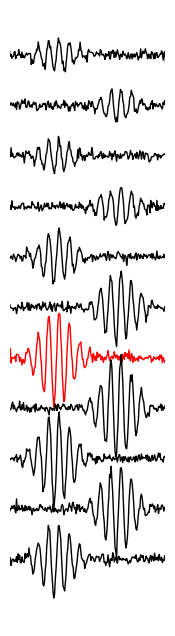

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 0.5, int(fs * 1))  # Time vector (0 to 0.5 seconds)
n_channels = 11  # Number of channels (rows)
f_ripple = 150  # Frequency of the ripple (150 Hz, typical for hippocampal SWR)
noise_level = 0.1  # Small noise to make it realistic

# Amplitudes
amplitudes = (np.float32([0.15066703, 0.15041492, 0.15354033, 0.15755153, 0.16833866, 0.17786268, 0.18966555, 0.19084985, 0.18718866, 0.18549542, 0.17947777])*10)**5
amplitudes = amplitudes / np.max(amplitudes) / 0.5

# Centers for the ripples
centers = [0.23, 0.27]  # Alternating centers

# Generate ripple signals for each channel
signals = []
for i in range(n_channels):
    signal = np.zeros_like(t)
    center = centers[i % 2]
    amp = amplitudes[i]
    envelope = amp * np.exp(-((t - center) ** 2) / (2 * 0.01 ** 2))
    ripple = envelope * np.sin(2 * np.pi * f_ripple * t)
    noise = noise_level * np.random.randn(len(t))
    signal += ripple + noise
    signals.append(signal)

# Find the channel with the largest amplitude
max_amp_idx = 6

# Plot the signals
plt.figure(figsize=(2, 8))
for i in range(n_channels):
    plot_idx = i  # Keep original index for signals
    if plot_idx == max_amp_idx:
        plt.plot(t, signals[plot_idx] + i * 2, color='red', linewidth=1, label='Max Amplitude')
    else:
        plt.plot(t, signals[plot_idx] + i * 2, color='black', linewidth=1)

plt.gca().invert_yaxis()  # Reverse the y-axis
plt.axis('off')  # Remove axes
plt.xlim(.2,.3)
plt.show()

In [2]:
t

array([0.        , 0.0005005 , 0.001001  , 0.0015015 , 0.002002  ,
       0.0025025 , 0.003003  , 0.0035035 , 0.004004  , 0.0045045 ,
       0.00500501, 0.00550551, 0.00600601, 0.00650651, 0.00700701,
       0.00750751, 0.00800801, 0.00850851, 0.00900901, 0.00950951,
       0.01001001, 0.01051051, 0.01101101, 0.01151151, 0.01201201,
       0.01251251, 0.01301301, 0.01351351, 0.01401401, 0.01451451,
       0.01501502, 0.01551552, 0.01601602, 0.01651652, 0.01701702,
       0.01751752, 0.01801802, 0.01851852, 0.01901902, 0.01951952,
       0.02002002, 0.02052052, 0.02102102, 0.02152152, 0.02202202,
       0.02252252, 0.02302302, 0.02352352, 0.02402402, 0.02452452,
       0.02502503, 0.02552553, 0.02602603, 0.02652653, 0.02702703,
       0.02752753, 0.02802803, 0.02852853, 0.02902903, 0.02952953,
       0.03003003, 0.03053053, 0.03103103, 0.03153153, 0.03203203,
       0.03253253, 0.03303303, 0.03353353, 0.03403403, 0.03453453,
       0.03503504, 0.03553554, 0.03603604, 0.03653654, 0.03703

In [149]:
import pandas as pd

df = pd.read_pickle(r"S:\Sachuriga\filre_with_table\adjust_y_with _meanVAlue\clusters_with_tsneLabel\ripple_max\ripple_py/63383_2024-07-25_A_units_table_withDLC.pkl")
df

index                                        spike_times unit_name  \
0      0  [57.29456666666667, 150.20443333333333, 176.42...        24   
1      1  [35.2727, 42.8282, 42.967933333333335, 44.0298...        25   
2      3  [40.668366666666664, 40.8535, 41.1472666666666...        34   
3      4  [21.5998, 21.608666666666668, 21.6150333333333...        20   
4      5  [21.6078, 21.616666666666667, 21.6267666666666...        21   
5      9  [21.606933333333334, 21.849233333333334, 21.87...        27   
6     10  [21.602366666666665, 21.604533333333332, 21.71...        36   
7     13  [22.778, 22.84, 23.0735, 23.248533333333334, 2...        39   
0      0  [24.859133333333332, 24.8641, 28.9736666666666...        45   
1      1  [30.6704, 40.83716666666667, 41.32476666666667...        50   
2      2  [40.937866666666665, 40.943533333333335, 44.79...        51   
3      3  [21.66283333333333, 21.712566666666667, 21.807...        43   
4      7  [21.606733333333334, 21.705766666666666, 21.73...        49   
0      0  [24.331, 24.384266666666665, 24.39093333333333...         1   
1      1  [42.314033333333334, 42.32606666666667, 42.724...         2   
2      2  [21.696566666666666, 21.7565, 21.7707666666666...        52   
3      4  [21.7697, 22.0312, 22.226666666666667, 22.2419...         4   
0      0  [37.6123, 37.80886666666667, 48.1589, 69.82906...        53   
1      1  [23.4142, 24.1821, 24.5324, 24.627966666666666...         6   
2      2  [21.619133333333334, 21.736166666666666, 21.98...         9   
3      3  [30.165233333333333, 30.1921, 30.2062333333333...        10   
0      0  [21.611366666666665, 21.641733333333335, 21.71...        12   
1      2  [24.041566666666668, 26.284666666666666, 29.13...        16   

   nn_miss_rate  num_negative_peaks.1  recovery_slope  amplitude_median  \
0      0.002589                   1.0   -98594.091255       -420.419983   
1      0.007090                   1.0  -110642.313450       -558.284973   
2      0.007117                   1.0   -84150.368274       -350.902466   
3      0.015811                   1.0   -35449.670955       -206.699982   
4      0.002649                   1.0   -86710.622033       -293.084991   
5      0.000488                   1.0   -81558.464657       -660.269958   
6      0.017786                   1.0   -63824.888009       -156.584991   
7      0.003505                   1.0   -71120.223500       -306.442474   
0      0.007270                   1.0  -114410.619565       -508.949982   
1      0.009751                   1.0  -114418.025105       -426.074982   
2      0.004575                   1.0  -142363.298995       -774.734985   
3      0.018602                   1.0  -162261.250447       -782.534973   
4      0.002475                   1.0  -168280.615299       -365.624969   
0      0.002125                   1.0   -30736.250392       -281.774994   
1      0.022333                   1.0   -54383.790084       -304.199982   
2      0.060750                   1.0   -77058.046329       -342.907471   
3      0.020500                   1.0   -78917.157010       -243.554977   
0      0.019341                   1.0   -76646.215944       -278.264984   
1      0.010999                   1.0   -54172.582377       -328.867493   
2      0.039533                   1.0  -112147.511821       -326.039978   
3      0.032568                   1.0  -125936.993846       -473.557465   
0      0.001750                   1.0  -147317.586522       -334.619995   
1      0.010500                   1.0   -64651.181150       -334.034973   

   recovery_slope.1  cluster_id.21  group  ...  bursting_index  \
0     -98594.091255            0.0      3  ...        0.428571   
1    -110642.313450            1.0      3  ...        0.661290   
2     -84150.368274            3.0      3  ...        0.581395   
3     -35449.670955           19.0      3  ...        0.553004   
4     -86710.622033           20.0      3  ...        1.270918   
5     -81558.464657           24.0      3  ...       

In [ ]:
temp_lfps = []
temp_lfps_times = []
temp = result
#@title Time (in seconds) { run: "auto", vertical-output: true, display-mode: "form" }
chs =  [36,48, 58, 56, 45, 32, 53, 47, 33, 40 , 50]
temp_lfps=[]
for ch in chs:
    temp_lfp = lfp[:, ch]
    eeg_examples = nap.Tsd(t=lfp_times, d=temp_lfp, fs=1250)
    signal = eeg_examples.restrict(rest_ep).values
    t = eeg_examples.restrict(rest_ep).index.values
    temp_lfps.append(list(signal))
    temp_lfps_times = list(t)

# Convert to numpy array and normalize
raw_lfp = np.array(temp_lfps).T
data =raw_lfp
data

array([[-354.9     , -359.58    , -339.3     , ..., -179.59499 ,
        -154.04999 , -117.78    ],
       [-317.46    , -310.05    , -282.75    , ..., -114.854996,
         -88.335   ,  -43.484997],
       [-355.095   , -334.03497 , -297.96    , ..., -109.005   ,
         -80.729996,  -34.515   ],
       ...,
       [  60.449997,   52.26    ,   63.569996, ...,   93.99    ,
          97.10999 ,  108.81    ],
       [  98.28    ,   95.159996,   91.064995, ...,  108.615   ,
         114.659996,  127.335   ],
       [ 102.765   ,   96.91499 ,   78.39    , ...,   77.805   ,
          82.68    ,   91.84499 ]], dtype=float32)

In [22]:
chs =  [56, 45, 32, 53, 47, 33, 40 , 50]
for ch in chs:
    temp_lfp = lfp[:, ch]
    eeg_examples = nap.Tsd(t=lfp_times, d=temp_lfp, fs=1250)
    signal = eeg_examples.restrict(rest_ep).values
    t = eeg_examples.restrict(rest_ep).index.values
    temp_lfps.append(list(signal))
    temp_lfps_times = list(t)

# Convert to numpy array and normalize
raw_lfp = np.array(temp_lfps).T
data = z_score_normalization(raw_lfp)

In [46]:
ripple_peaks=[]
ripple_peaks=[t[2]/1250 for t in swr_events2]
pred_indexes = [t[0:2]for t in swr_events2]
pred_indexes 

[(17223, 17340),
 (41351, 41440),
 (42196, 42349),
 (45639, 45817),
 (46702, 46876),
 (47192, 47291),
 (72479, 72588),
 (88699, 88951),
 (95184, 95336),
 (129519, 129593),
 (167009, 167305),
 (170274, 170663),
 (173897, 174311),
 (177344, 177560),
 (186675, 186835),
 (186975, 187470),
 (193568, 193679),
 (193778, 193872),
 (205452, 205746),
 (207437, 207765),
 (211075, 211259),
 (218363, 218606),
 (223736, 223967),
 (243470, 243796),
 (255401, 255550),
 (260824, 260992),
 (285130, 285331),
 (292480, 292663),
 (297635, 297899),
 (298896, 298982),
 (312253, 312411),
 (334925, 335153),
 (353804, 354037),
 (434673, 435010),
 (453806, 453887),
 (463743, 463822)]

In [ ]:
pre_indx= [t[0]/1250 for t in swr_events]

112

In [86]:
from load_data import z_score_normalization, downsample_data
from utils import smooth2ripple
from load_data import generate_overlapping_windows

In [91]:
import numpy as np
from scipy.signal import hilbert, butter, filtfilt, find_peaks
from scipy.ndimage import gaussian_filter1d

# # Data preprocessing (unchanged)
# #temp = [31, 12, 23, 28, 15, 29, 7, 13]  # Electrode indices
# temp_lfps = []
# temp_lfps_times = []

# # Extract LFP signals for selected electrodes
# for ch in temp:
#     temp_lfp = lfp[:, ch]
#     eeg_examples = nap.Tsd(t=lfp_times, d=temp_lfp, fs=1250)
#     signal = eeg_examples.restrict(rest_ep).values
#     t = eeg_examples.restrict(rest_ep).index.values
#     temp_lfps.append(list(signal))
#     temp_lfps_times = list(t)

# # Convert to numpy array and normalize
# raw_lfp = np.array(temp_lfps).T
# data = z_score_normalization(raw_lfp)

# Existing functions (unchanged)
def detect_swrs(
    lfp_data,
    electrode_idx,
    sampling_rate,
    ripple_band=(70, 250),
    amplitude_threshold=4,
    min_duration=0.05,
    max_duration=2.0,
    gaussian_std_ms=12.5
):
    """
    Detect sharp wave ripples (SWRs) in LFP data from a single electrode.
    [Docstring unchanged]
    """
    # Extract LFP for the chosen electrode
    lfp = lfp_data[:, electrode_idx]

    # Apply bandpass filter
    nyquist = sampling_rate / 2
    lowcut, highcut = ripple_band
    b, a = butter(4, [lowcut / nyquist, highcut / nyquist], btype='band')
    filtered_lfp = filtfilt(b, a, lfp)

    # Compute amplitude envelope
    amplitude_envelope = np.abs(hilbert(filtered_lfp))

    # Smooth envelope with Gaussian kernel
    gaussian_std_samples = gaussian_std_ms * sampling_rate / 1000
    smoothed_envelope = gaussian_filter1d(amplitude_envelope, sigma=gaussian_std_samples)

    # Calculate detection threshold
    mean_envelope = np.mean(smoothed_envelope)
    std_envelope = np.std(smoothed_envelope)
    threshold = mean_envelope + amplitude_threshold * std_envelope

    # Find peaks above threshold
    peak_indices = find_peaks(smoothed_envelope, height=threshold)[0]

    # Detect SWR events
    swr_events = []
    min_samples = int(min_duration * sampling_rate)
    max_samples = int(max_duration * sampling_rate)

    for peak_idx in peak_indices:
        # Find start of event
        start_idx = peak_idx
        while start_idx > 0 and smoothed_envelope[start_idx] > mean_envelope:
            start_idx -= 1
        if start_idx > 0:
            start_idx += 1

        # Find end of event
        end_idx = peak_idx
        while end_idx < len(smoothed_envelope) - 1 and smoothed_envelope[end_idx] > mean_envelope:
            end_idx += 1
        if end_idx < len(smoothed_envelope) - 1:
            end_idx -= 1

        # Validate event duration
        if min_samples <= (end_idx - start_idx) <= max_samples:
            swr_events.append((start_idx, end_idx, peak_idx))

    return swr_events

def butter_bandpass(lowcut, highcut, fs, order=4):
    """Design a bandpass Butterworth filter."""
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """Apply a bandpass filter to the data."""
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data, axis=0)

def find_max_electrode(data, fs, n_electrodes, events):
    """
    Identify the electrode with the largest average ripple power.
    [Docstring unchanged]
    """
    # Filter signal in ripple band
    filtered_data = bandpass_filter(data, 100, 250, fs)
    squared_data = filtered_data ** 2

    # Compute average power across events
    average_powers = np.zeros(n_electrodes)
    times_rip = np.zeros(n_electrodes)
    for start, end, peak in events:
        segment = squared_data[start:peak, :]
        power = np.mean(segment, axis=0)
        average_powers += power
        times_rip += (peak-start)
    average_powers /= len(events)
    #average_powers_sum /= times_rip 
    # Identify electrode with maximum power
    max_electrode = np.argmax(average_powers)
    print(f"The electrode with the largest average ripple power is {max_electrode}")
    return average_powers, max_electrode

# New function wrapping the main execution
def process_swr_analysis(data, temp, electrode_idx=0, sampling_rate=1250, n_electrodes=8, amplitude_threshold=2):
    """
    Process LFP data to detect SWRs and find the electrode with maximum ripple power.

    Parameters
    ----------
    data : ndarray
        Normalized LFP data.
    temp : list
        List of electrode indices.
    electrode_idx : int, optional
        Index of the initial electrode for SWR detection (default: 0).
    sampling_rate : float, optional
        Sampling rate in Hz (default: 1250).
    n_electrodes : int, optional
        Number of electrodes (default: 8).

    Returns
    -------
    swr_events : list
        List of detected SWR events.
    max_electrode : int
        Index of the electrode with maximum ripple power.
    """
    lfp_data = data
    fs = sampling_rate

    # Detect SWRs and find max electrode
    swr_events = detect_swrs(lfp_data, electrode_idx, sampling_rate, amplitude_threshold=amplitude_threshold)
    average_powers, max_electrode = find_max_electrode(data, fs, n_electrodes, swr_events)
    print(f"The max channel is {temp[max_electrode]}")
    
    return average_powers,swr_events, max_electrode

# Example call to the new function
# swr_events, max_electrode = process_swr_analysis(data, temp)

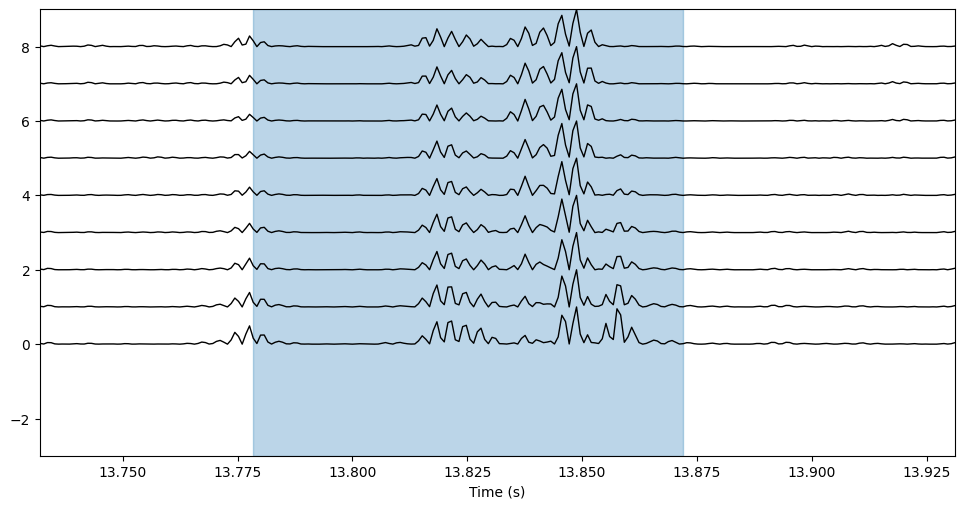

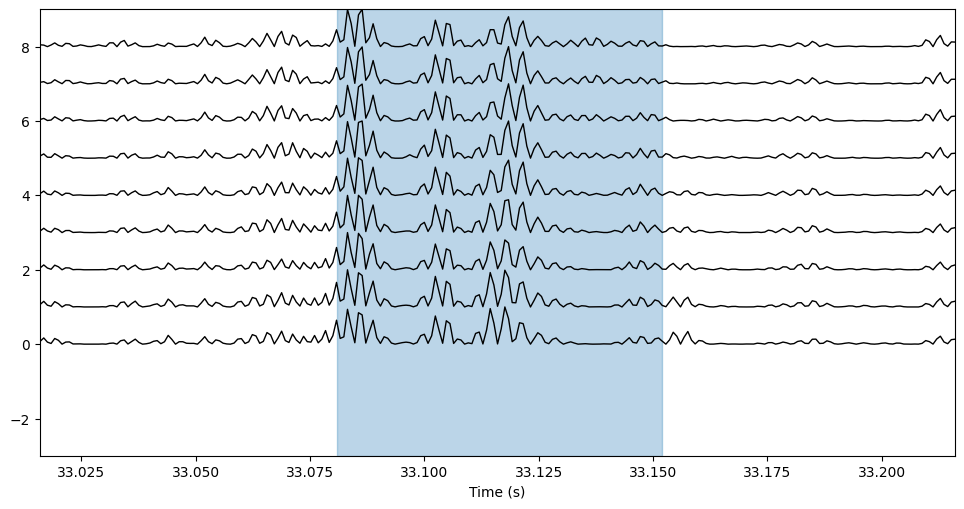

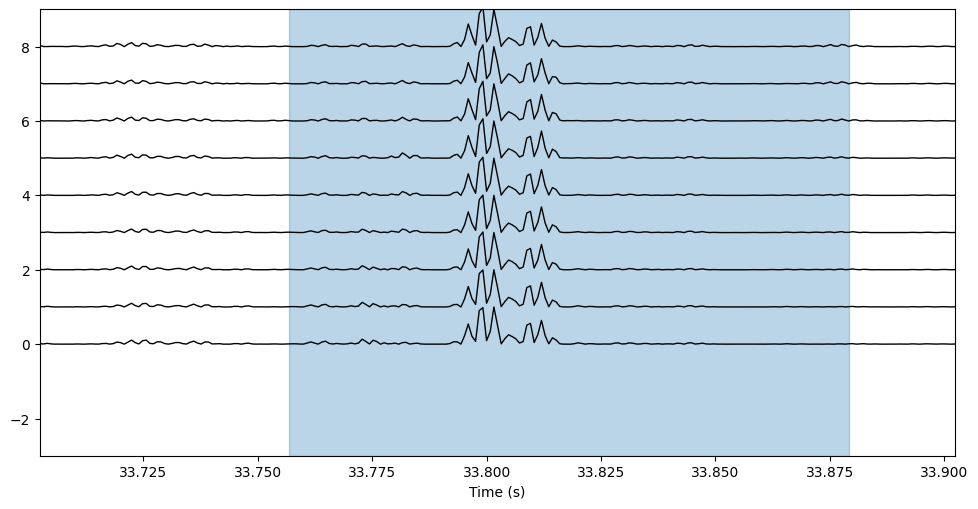

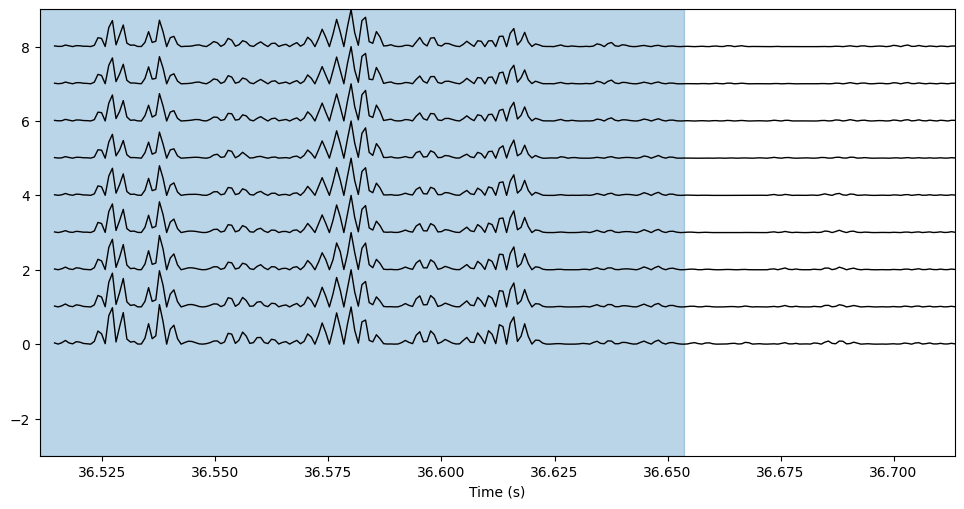

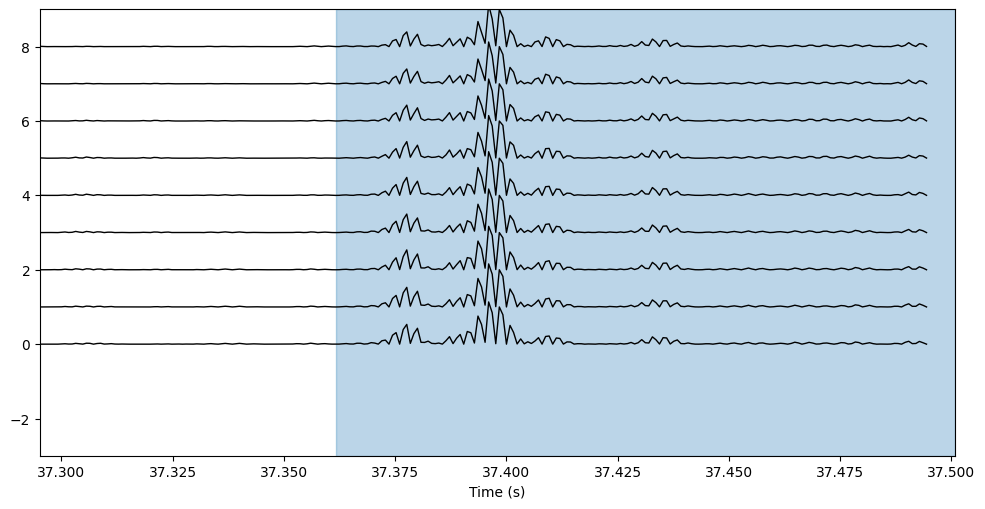

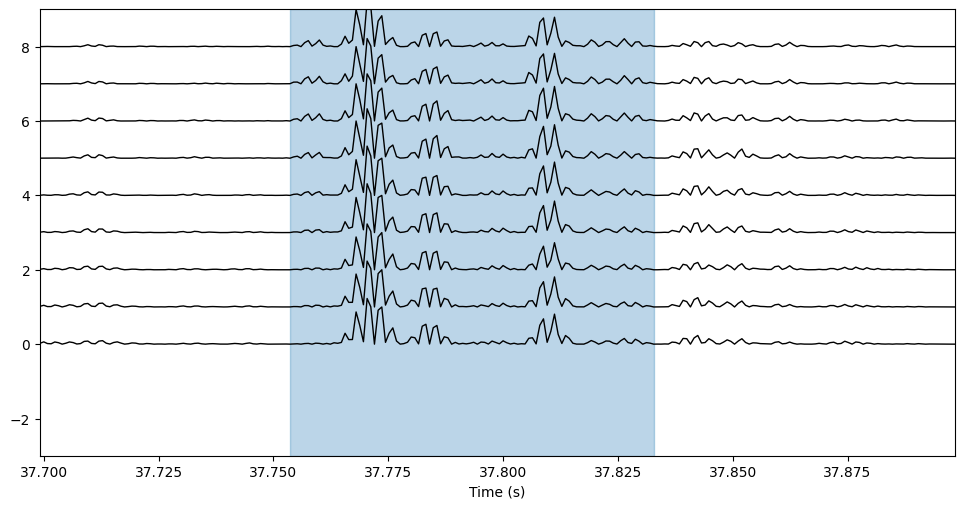

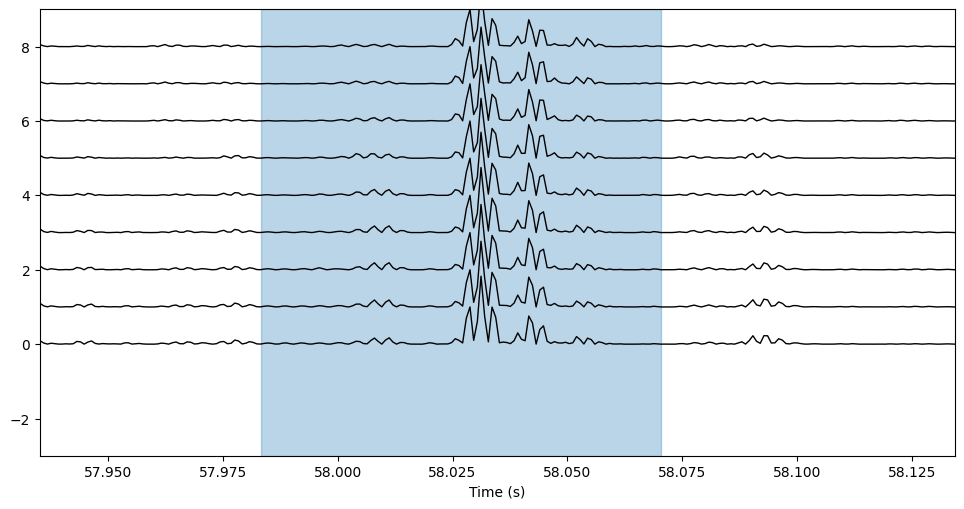

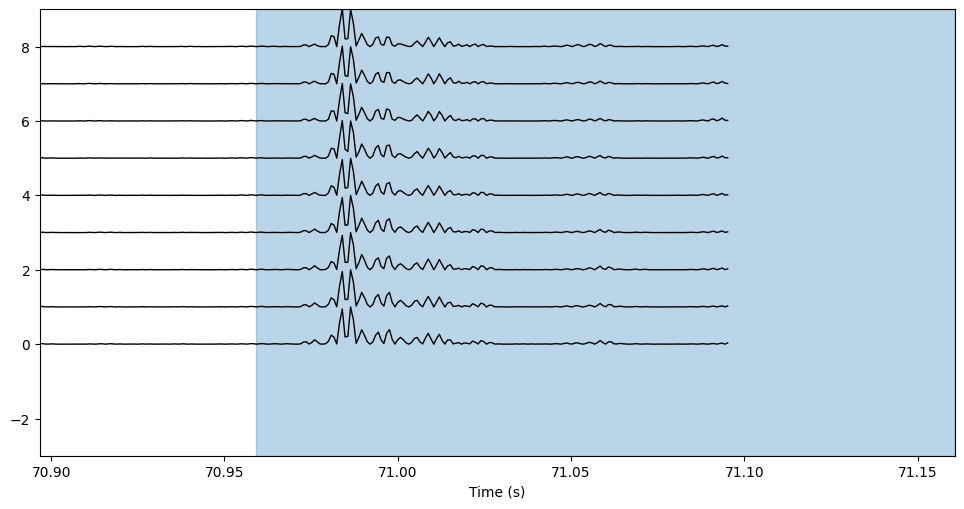

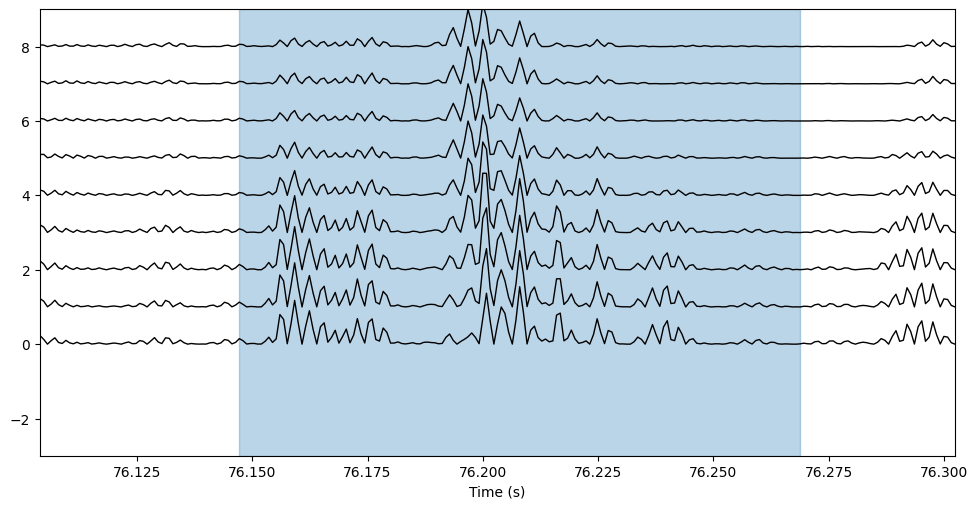

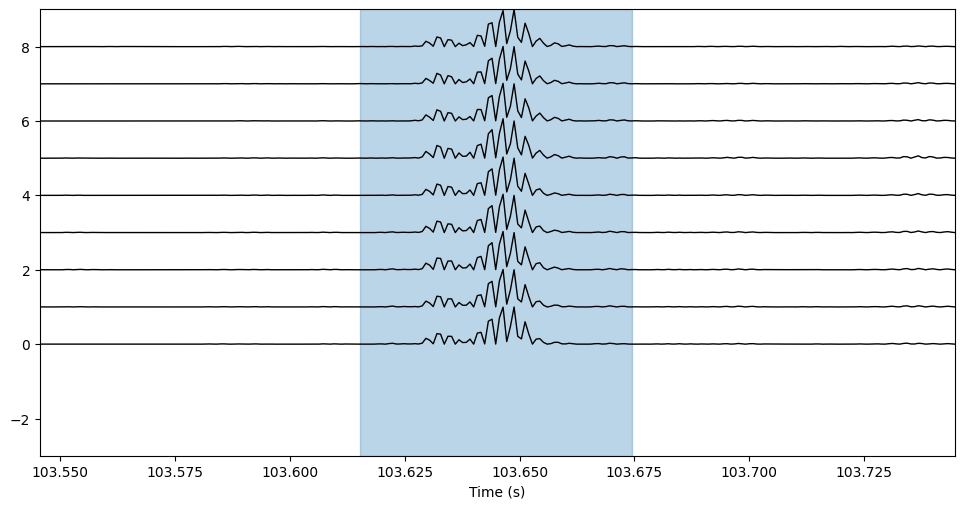

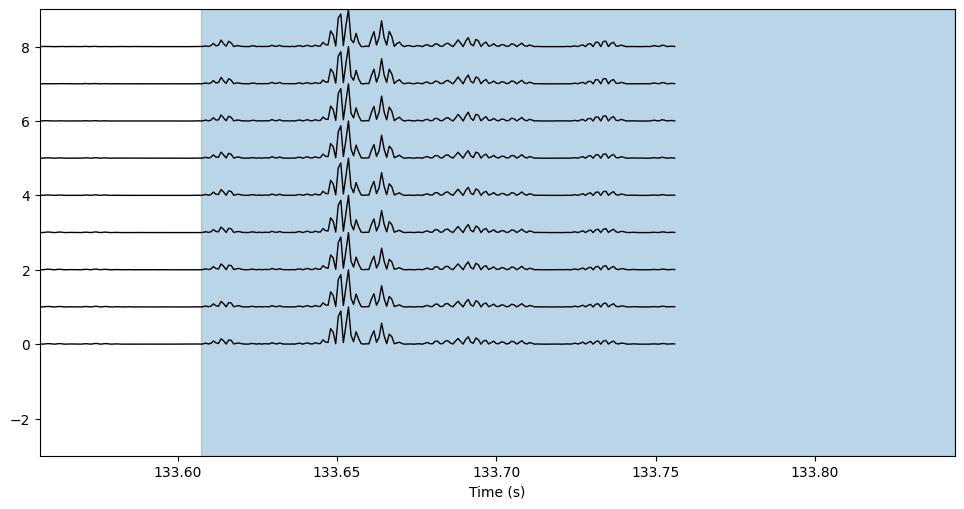

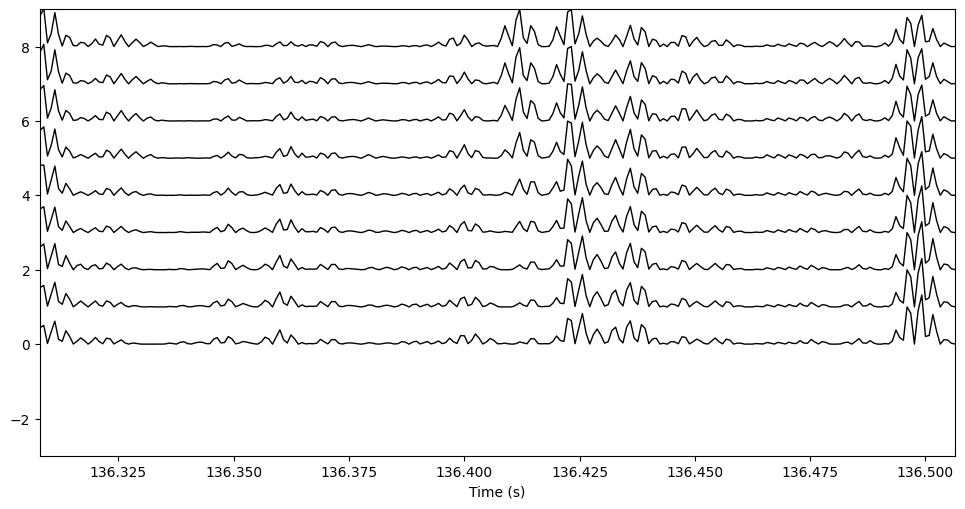

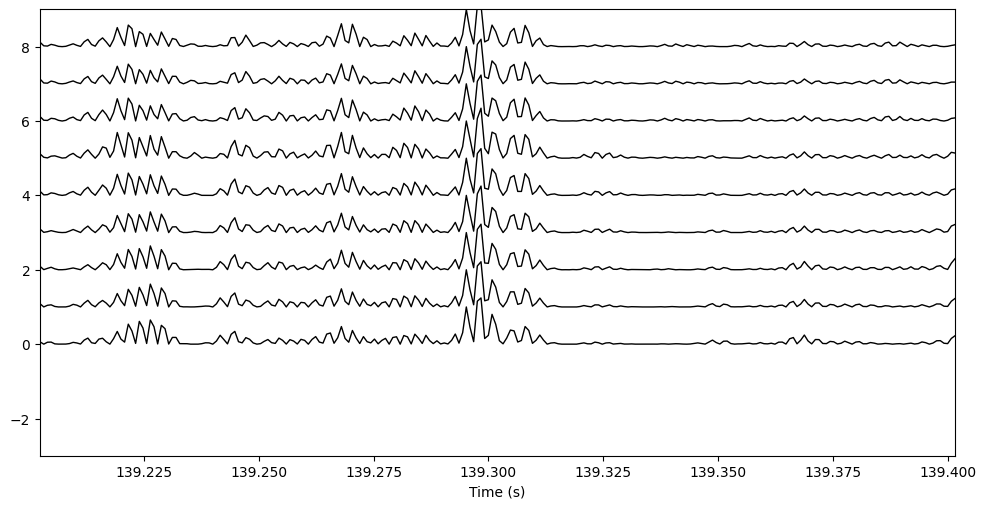

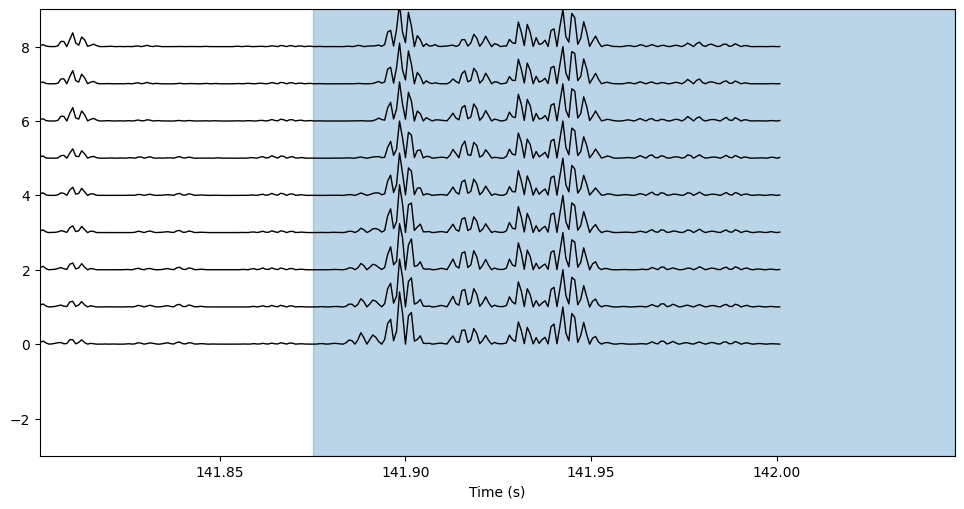

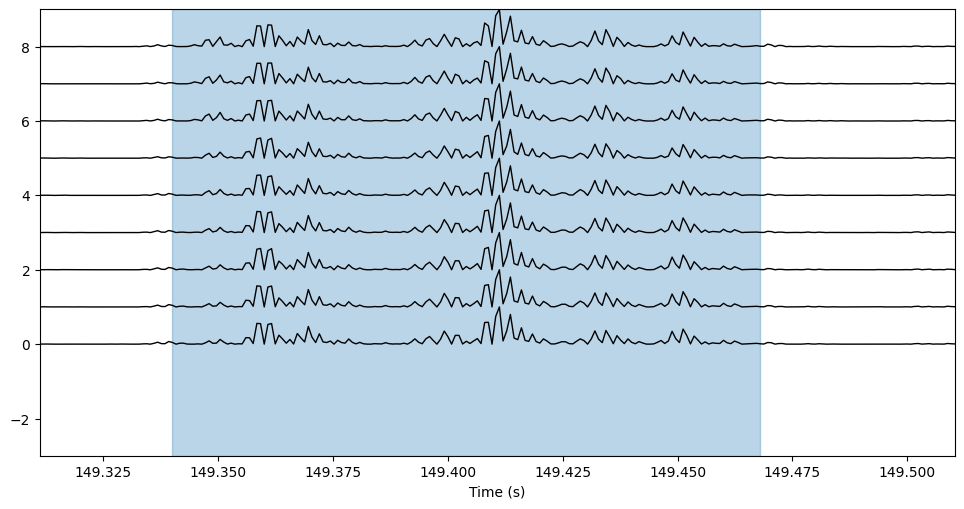

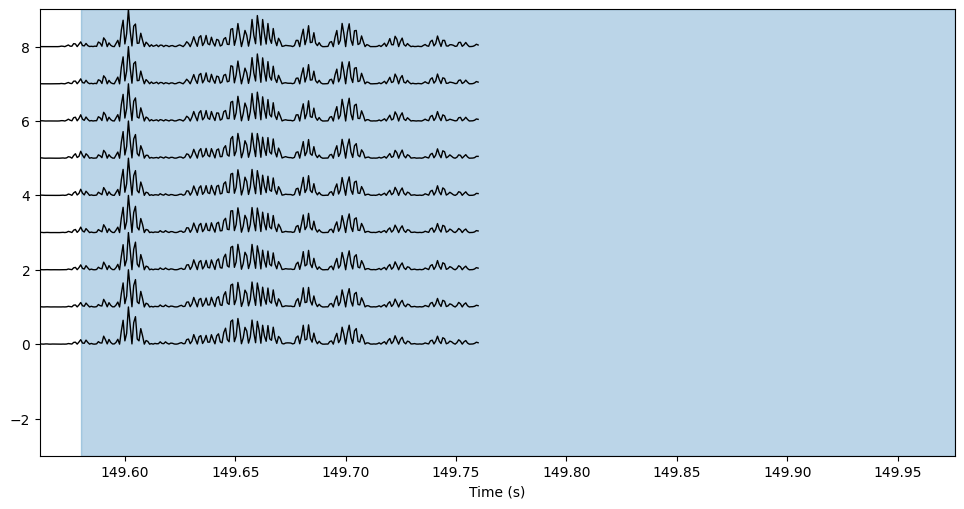

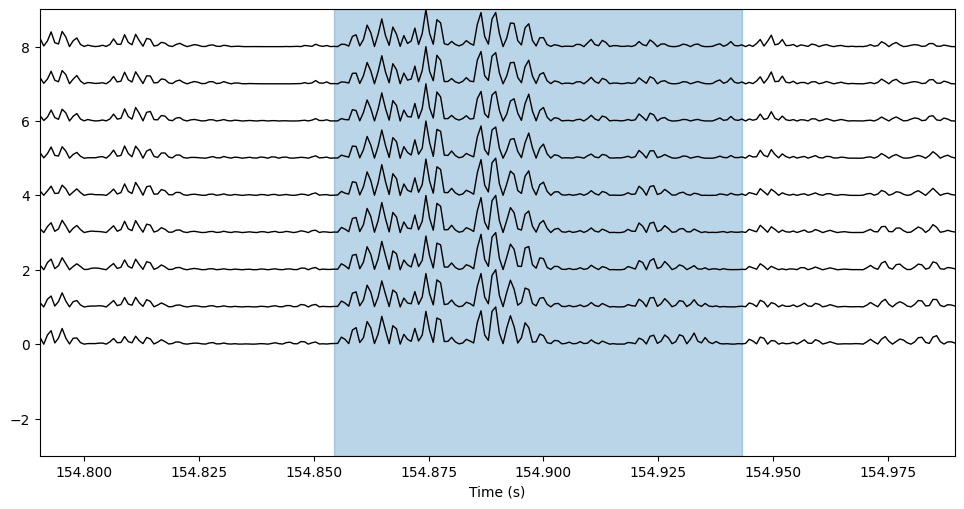

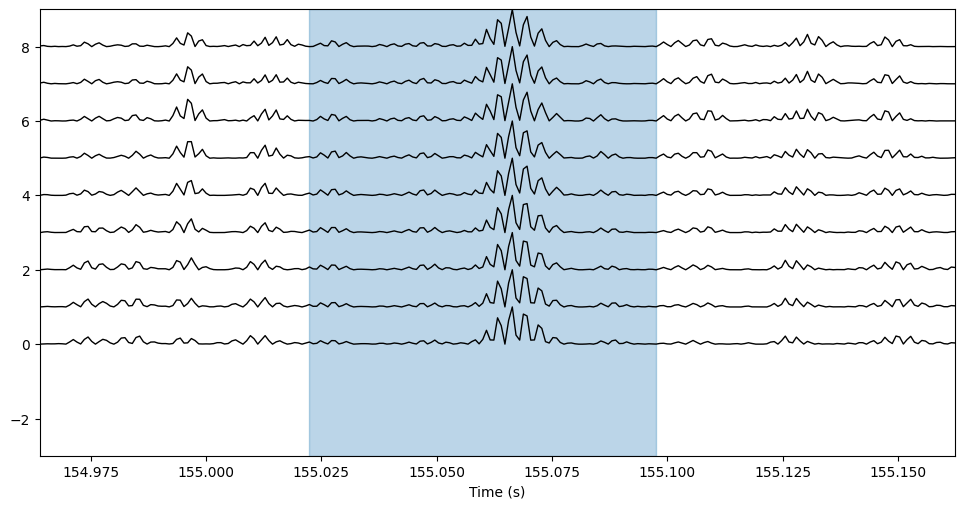

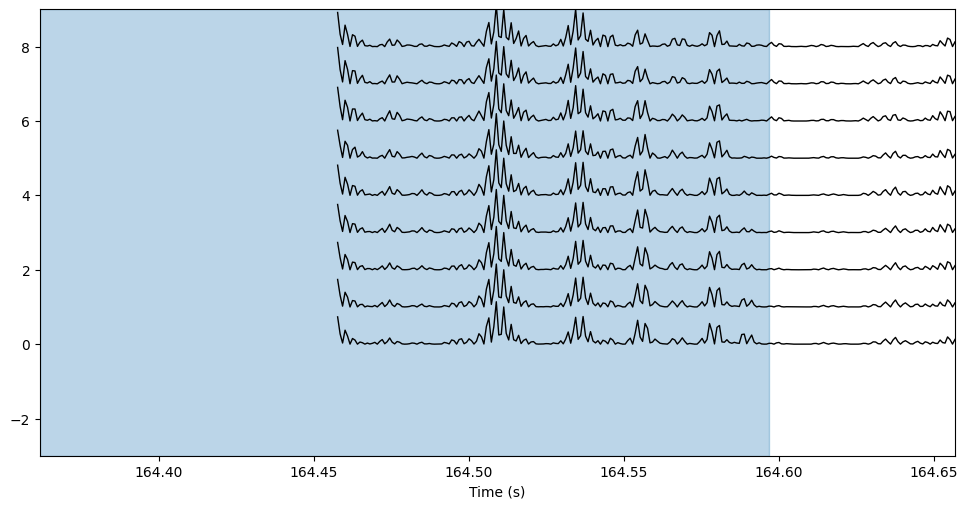

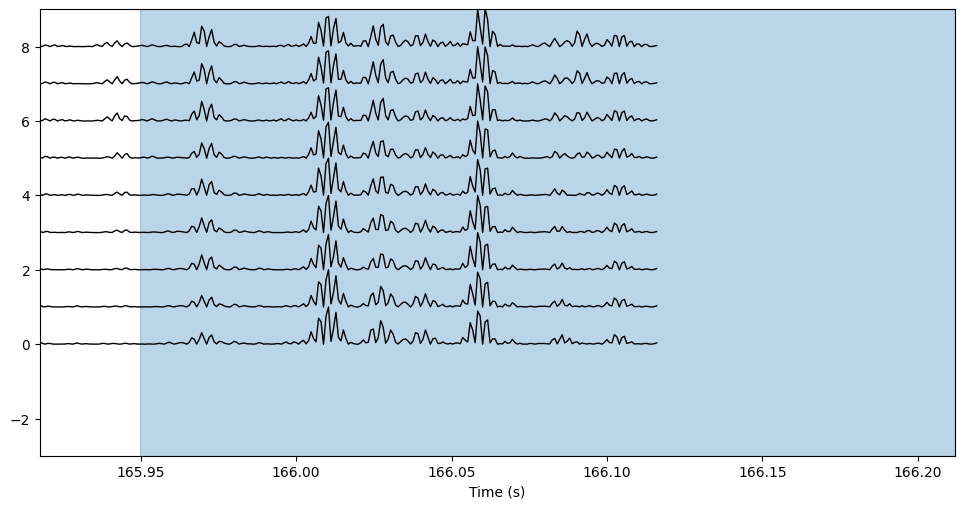

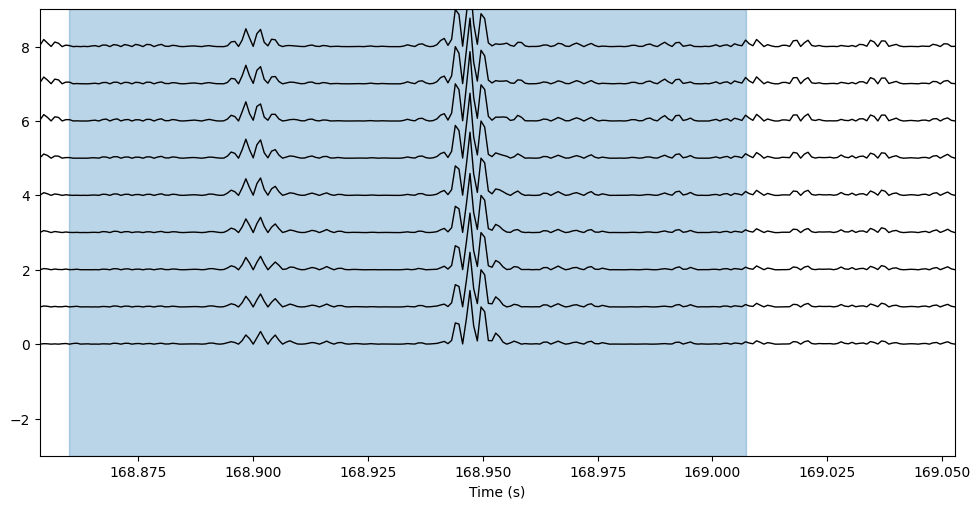

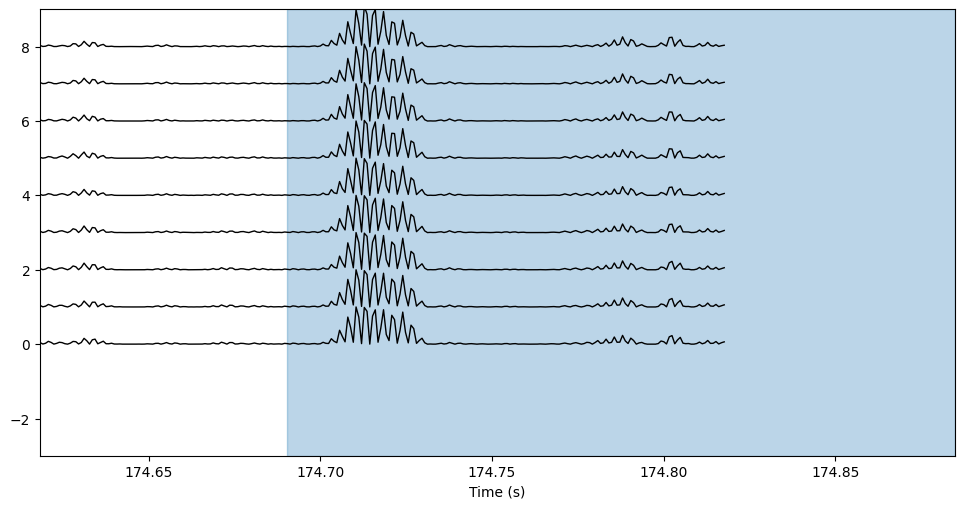

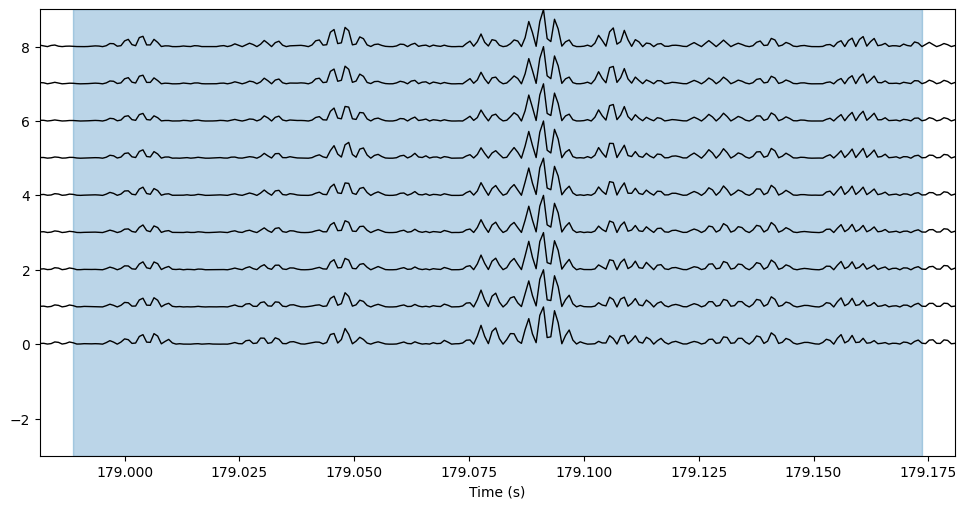

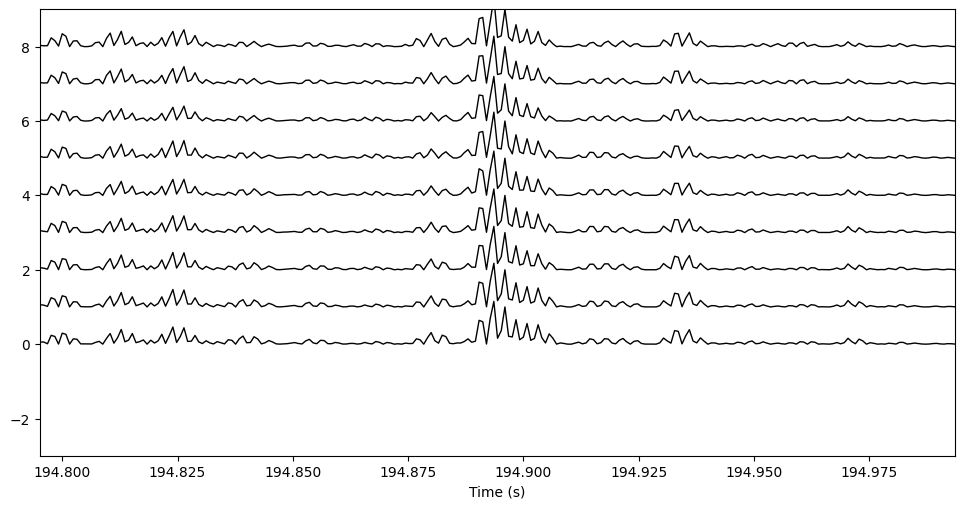

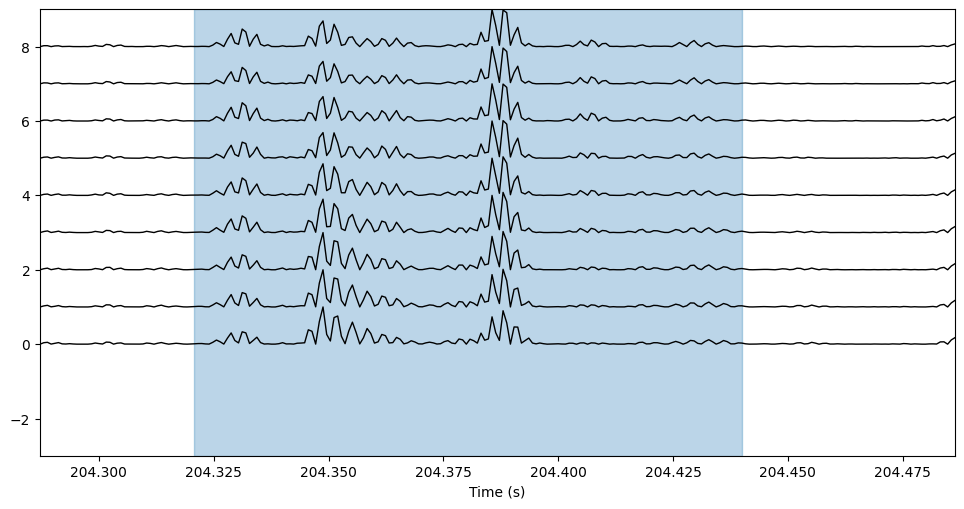

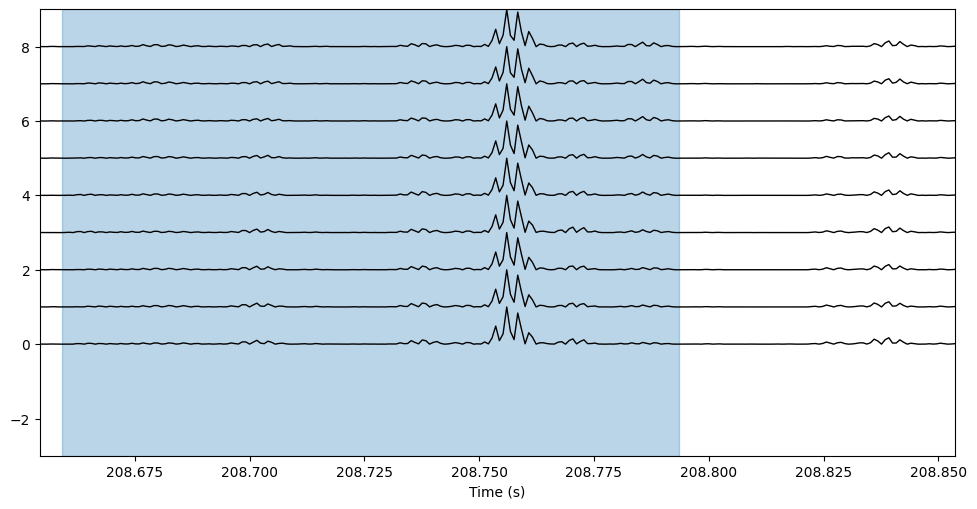

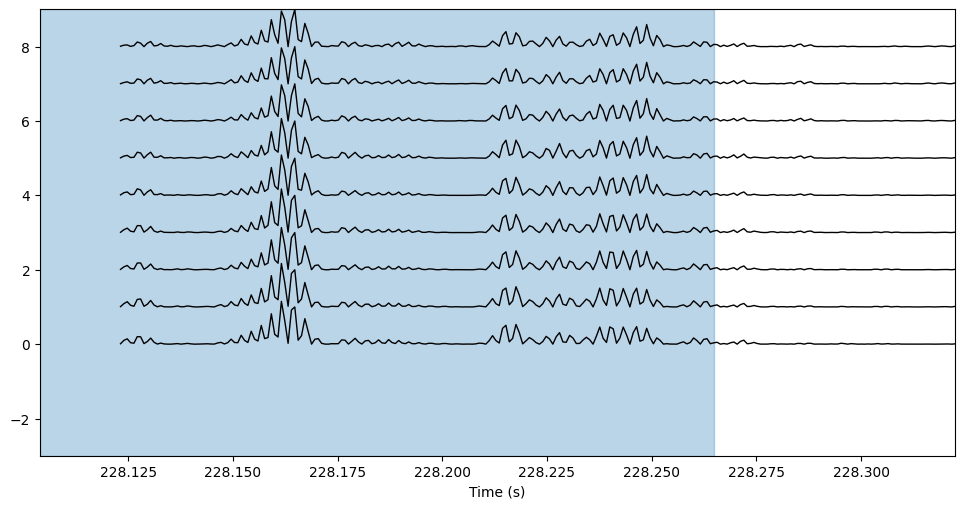

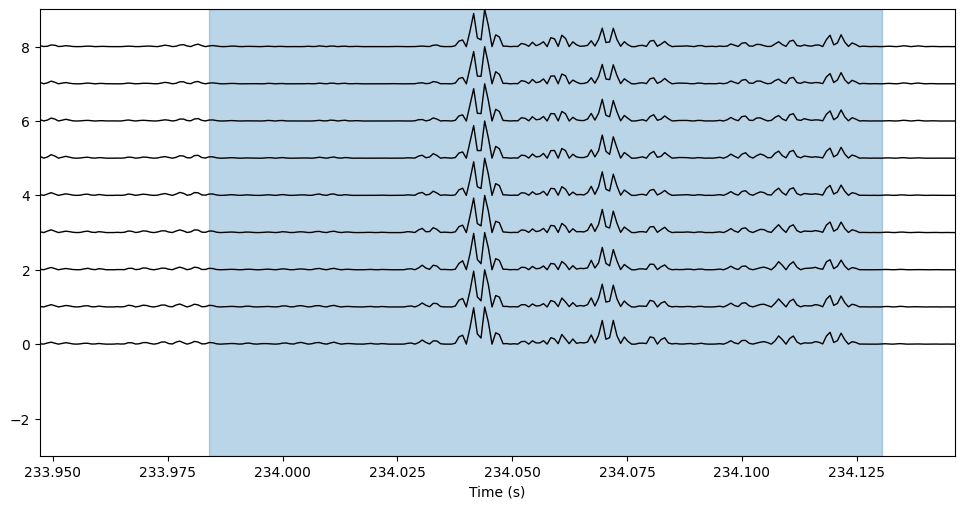

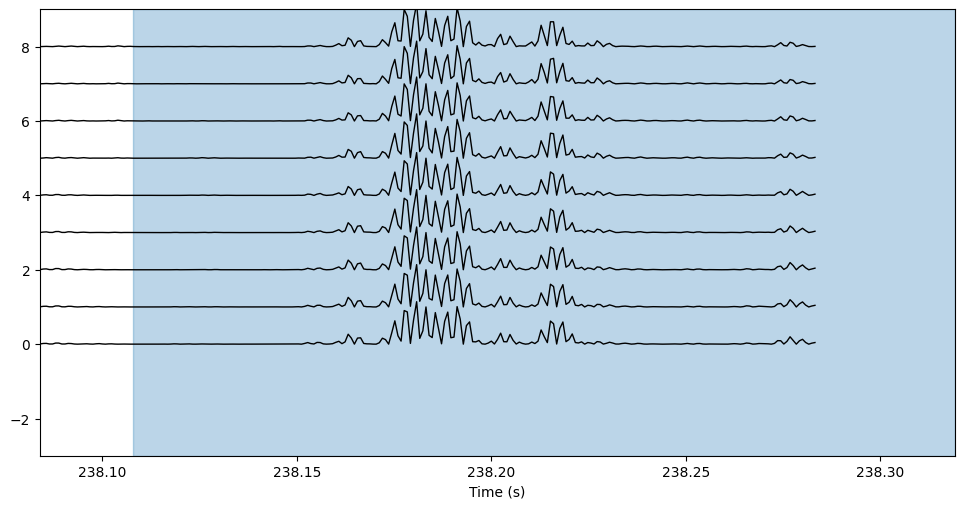

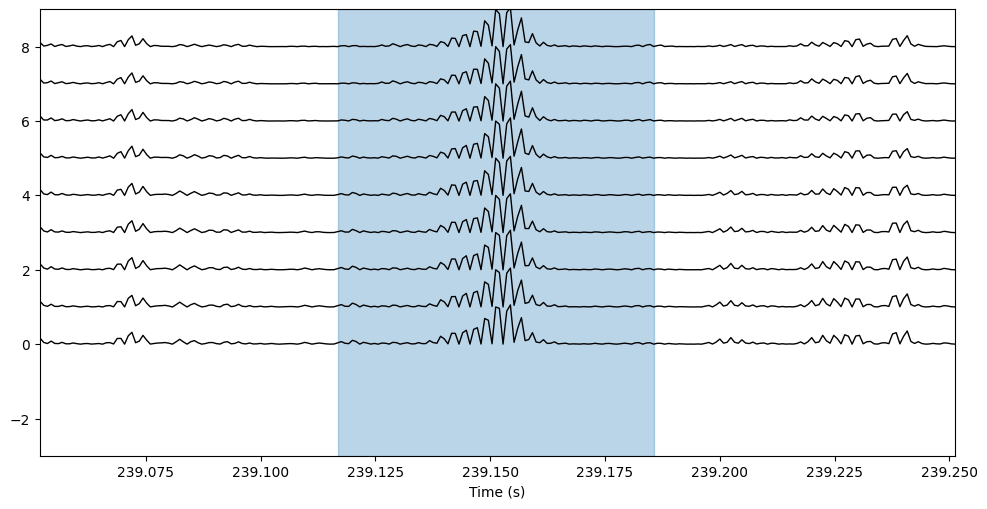

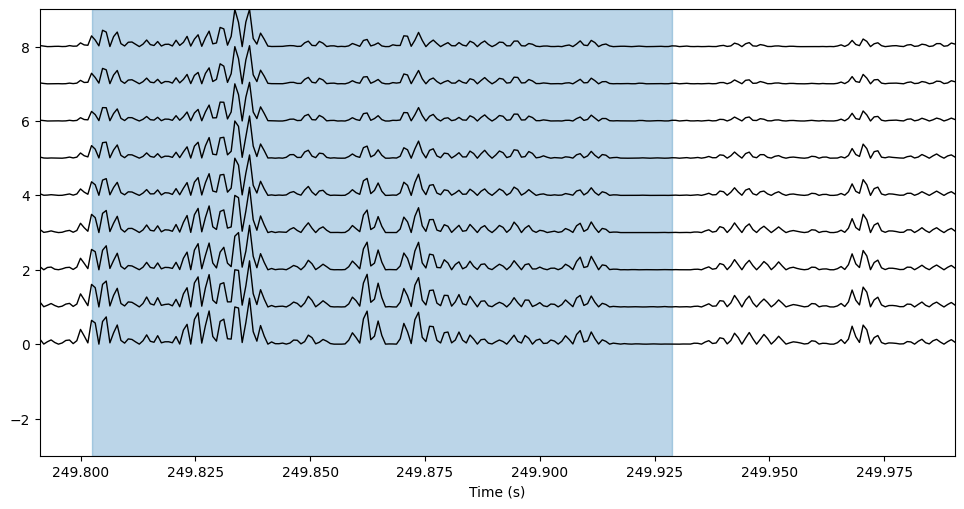

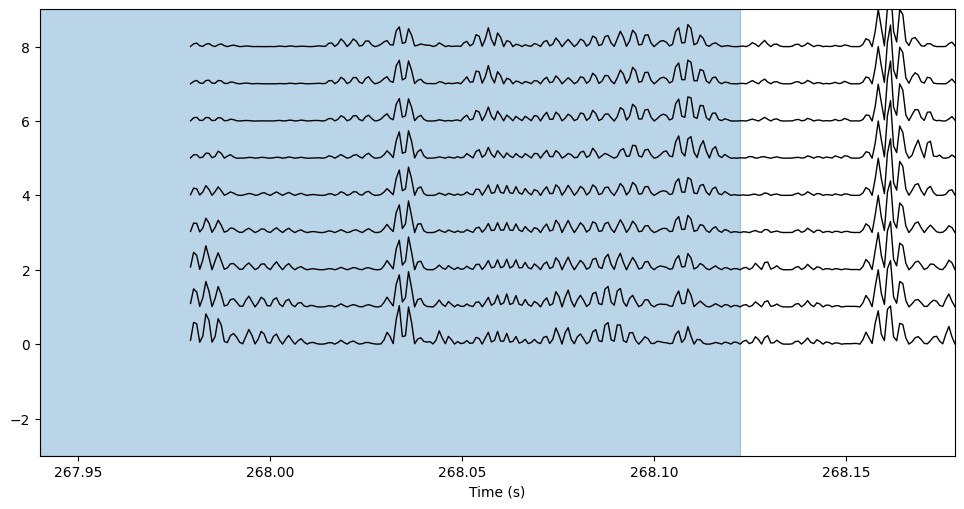

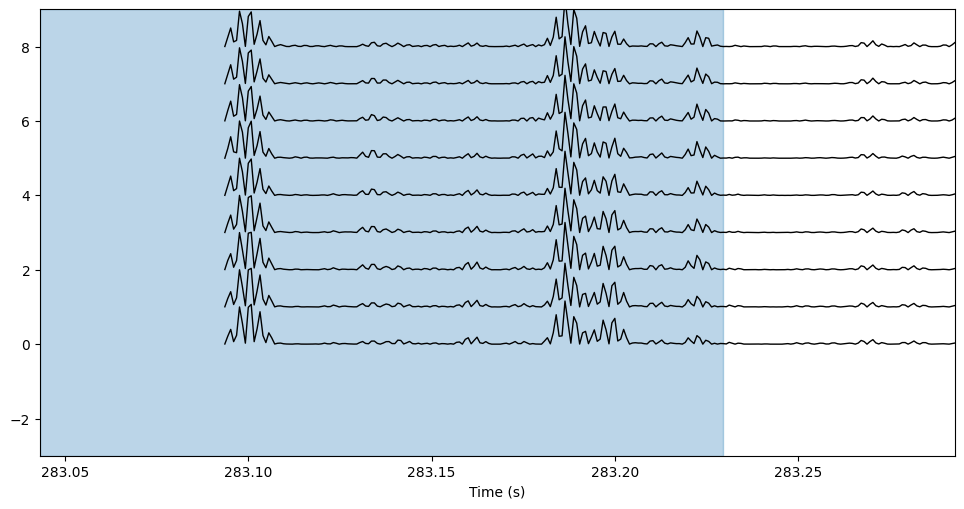

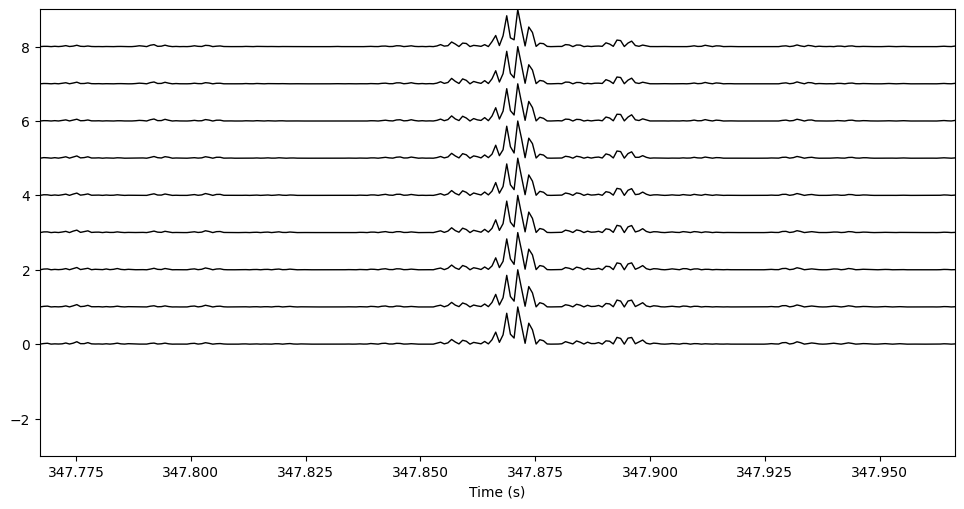

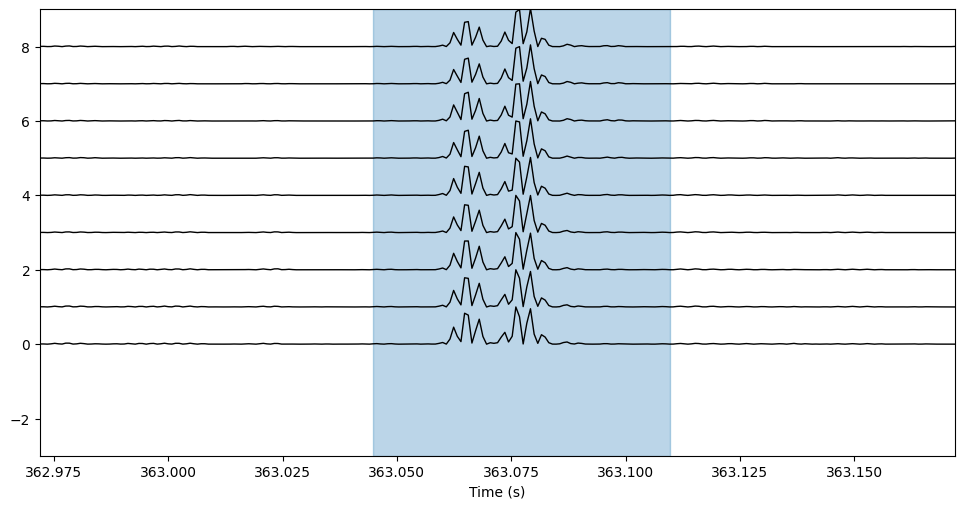

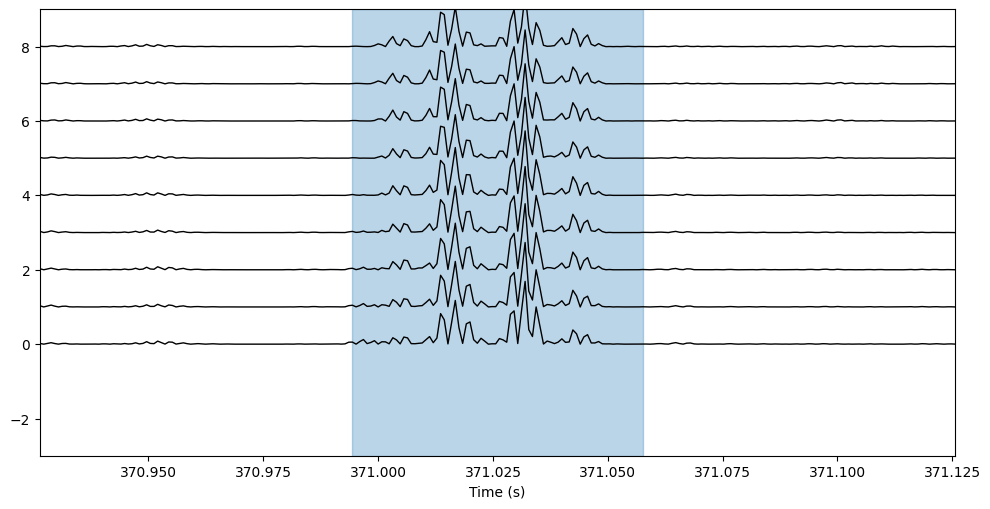

In [ ]:
for t in ripple_peaks:
    plot_ripples(t)

In [85]:
#@markdown This is an interactive plot of the loaded data, where detected ripples are shown in blue. Data is displayed in chunks of 1 seconds and you can **move forward, backwards or jump to an specific second** using the control bar at the bottom.\
#@markdown \
#@markdown Run this cell to load the plotting method. Execute the **following** cell to use the method.

import matplotlib.pyplot as plt
  # lfp = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/63383/63383_2024-07-25_12-57-40_A_phy_k_manual/lfp_raw.npy")
  # lfp_time = np.load(r"S:\Sachuriga\Ephys_Recording\CR_CA1/63383/63383_2024-07-25_12-57-40_A_phy_k_manual/lfp_times.npy")
temp_lfps = []
temp_lfps_times = []
temp = result
#@title Time (in seconds) { run: "auto", vertical-output: true, display-mode: "form" }
chs =  [58, 56, 45, 32, 53, 47, 33, 40 , 50]
temp_lfps=[]
for ch in chs:
    temp_lfp = lfp[:, ch]
    eeg_examples = nap.Tsd(t=lfp_times, d=temp_lfp, fs=1250)
    signal = eeg_examples.restrict(rest_ep).values
    t = eeg_examples.restrict(rest_ep).index.values
    temp_lfps.append(list(signal))
    temp_lfps_times = list(t)

# Convert to numpy array and normalize
raw_lfp = np.array(temp_lfps).T
data =raw_lfp
data
data = z_score_normalization(data)
data_smooth = smooth2ripple(data,fs=1250, low_cut = 120, high_cut = 250)

def plot_ripples(k):
  downsampled_fs=1250
  data_size = data.shape[0]
  data_dur = data_size / downsampled_fs
  times = np.arange(data_size) / downsampled_fs

  if k >= times[-1]:
    print("Data is only %ds long!"%(times[-1]))
    return
  elif k < 0:
    print("Please introduce a valid integer.")
    return

  ini_idx = int((k-0.1) * downsampled_fs)
  end_idx = np.minimum(int((k + 0.1) * downsampled_fs), data_size-1)
  pos_mat = list(range(data.shape[1]-1, -1, -1)) * np.ones((end_idx-ini_idx, data.shape[1]))

  fig = plt.figure(figsize=(9.75,5))
  ax = fig.add_subplot(1, 1, 1)
  ax.set_ylim(-3, 9)
  ax.margins(x=0)
  plt.tight_layout()
  plt.xlabel("Time (s)")


  lines = ax.plot(times[ini_idx:end_idx], (data[ini_idx:end_idx, :]*1/np.max(data[ini_idx:end_idx, :], axis=0))**2 + pos_mat, color='k', linewidth=1)

  fills = []
  for pred in pred_indexes:
      if (pred[0] >= ini_idx and pred[0] <= end_idx) or (pred[1] >= ini_idx and pred[1] <= end_idx):
          rip_ini = (pred[0]) / downsampled_fs
          rip_end = (pred[1]) / downsampled_fs
          fill = ax.fill_between([rip_ini, rip_end], [-3, -3], [9, 9], color="tab:blue", alpha=0.3)
          fills.append(fill)

  plt.show()

print("Loaded!")

Loaded!


In [18]:
import matplotlib.pyplot as plt
downsampled_fs=1250



def plot_ripples(k):
  data_size = data.shape[0]
  data_dur = data_size / downsampled_fs
  times = np.arange(data_size) / downsampled_fs

  if k >= times[-1]:
    printf("Data is only %ds long!"%(times[-1]))
    return
  elif k < 0:
    print("Please introduce a valid integer.")
    return

  ini_idx = int(k * downsampled_fs)
  end_idx = np.minimum(int((k+1) * downsampled_fs), data_size-1)


  pos_mat = list(range(data.shape[1]-1, -1, -1)) * np.ones((end_idx-ini_idx, data.shape[1]))

  fig = plt.figure(figsize=(9.75,5))
  ax = fig.add_subplot(1, 1, 1)
  ax.set_ylim(-3, 9)
  ax.margins(x=0)
  plt.tight_layout()
  plt.xlabel("Time (s)")


  lines = ax.plot(times[ini_idx:end_idx], data[ini_idx:end_idx, :]*1/np.max(data[ini_idx:end_idx, :], axis=0) + pos_mat, color='k', linewidth=1)

  fills = []
  for pred in pred_indexes:
      if (pred[0] >= ini_idx and pred[0] <= end_idx) or (pred[1] >= ini_idx and pred[1] <= end_idx):
          rip_ini = (pred[0]) / downsampled_fs
          rip_end = (pred[1]) / downsampled_fs
          fill = ax.fill_between([rip_ini, rip_end], [-3, -3], [9, 9], color="tab:blue", alpha=0.3)
          fills.append(fill)

  plt.show()

print("Loaded!")

Loaded!
